## TEAM 4 
- @mnestr 
- @Jurix1c 
- @Ivan S.
- @Vladimir Moroz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Посмотрим бенчмарк

In [3]:
samp_sub = pd.read_csv('sample_submission.csv')

In [4]:
samp_sub.head()

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,0
1,ccac3879652b08cb8b44c1920fd93afa,0
2,fcccab4d7a76f70647f015f2c84c2af8,0
3,ed8399278c30678dab739045fa12b440,0
4,1d4d62ac5cabcb48bac7112813f290cb,0


In [5]:
#Количество строк в бенчмарке
samp_sub.shape[0]

16476

### Посмотрим Train - Test данные

### Описание данных
#### Метрика ROC-AUC

- **_id** - идентификатор человека
- **age** - возраст
- **job** - тип работы ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
- **marital** - семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")
- **education** - уровень образования ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
- **default** - есть ли дефолт по кредиту ("no","yes","unknown")
- **housing** - есть ли кредит на жилье ("no","yes","unknown")
- **loan** - есть ли персональный кредит ("no","yes","unknown")
- **contact** - контактный тип связи ("cellular","telephone")
- **month** - последний контактный месяц года ("jan", "feb", "mar", ..., "nov", "dec")
- **day_of_week**- последний контактный день недели ("mon","tue","wed","thu","fri")
- **duration** - длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.
- **campaign** - количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)
- **pdays** - количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)
- **previous** - количество контактов, выполненных до текущей маркетинговой кампании для этого клиента
- **poutcome** - результат предыдущей маркетинговой кампании ("failure","nonexistent","success")

#### Ниже приведены показатели окружающей среды и банка

- **emp.var.rate** - изменение уровня занятости (квартальный показатель)
- **cons.price.idx** - индекс потребительских цен (ежемесячный показатель)
- **cons.conf.idx** - индекс доверия потребителя (ежемесячный показатель)
- **euribor3m** - курс Euribor (ежедневный показатель)
- **nr.employed** - количество сотрудников (квартальный показатель)
- **target** - целевая переменная (таргет) - согласился ли клиент на вклад (депозит)

In [6]:
train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.shape

(24712, 22)

In [8]:
test.shape

(16476, 21)

In [9]:
print(train.columns)

Index(['_id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')


In [10]:
test.columns

Index(['_id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [154]:
train.pdays.describe()

count    24712.000000
mean       963.558797
std        184.224885
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

работаем только с train данными, тк test не размечен.

### Начнём исследование данных

In [13]:
#campaign #pdays #nunique #poutcome можно преобразовать и получить доп признаки

1) для начала объеденим train и test
2) преобразуем obj в признаки и попробуем прогнать модель на: 
- кнн
- дерева принятия решения
- логистической регрессии 

In [14]:
#метки переменной
y_train = train.iloc[:,-1]

In [15]:
#для простого разделения воспользуемся метками
train.loc[:, 'sample'] = 'train'
test.loc[:, 'sample'] = 'test'

In [16]:
train.shape

(24712, 23)

In [17]:
test.columns

Index(['_id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'sample'],
      dtype='object')

In [175]:
#слияние данных будет неверным, нужно убрать колонку 
data = train.drop('target',axis = 1).append(test).reset_index(drop=True)

In [176]:
#проверка 
data[data['sample'] == 'train'].shape[0] == train.shape[0]

True

In [177]:
print(data.shape[0] == (train.shape[0] + test.shape[0]))
print(data.shape)

True
(41188, 22)


In [178]:
data.month.unique()

array(['aug', 'may', 'jun', 'nov', 'oct', 'apr', 'jul', 'mar', 'sep',
       'dec'], dtype=object)

In [179]:
data['_id'].nunique()

41188

In [192]:
#выполним трансформацию признаков из obj в числовые
#создадим список признаков


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
_id               41188 non-null object
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
sample            41188 non-null object
dtypes: flo

['_id',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'sample']

In [254]:
df = data.drop(['day_of_week', 'month'],axis = 1)

In [255]:
df.loc[df['pdays']==999, 'pdays'] = 90

In [256]:
def obj_lst_contructor(data):
    obj_lst = []
    for i in data.columns: # перебираем все столбцы
        if str(data[i].dtype) == 'object':
            obj_lst.append(i)
    return obj_lst

obj_lst = obj_lst_contructor(df)


In [257]:
#преобразуем категориальные признаки в числовые
df = pd.get_dummies(df, columns = obj_lst[1:-1])

In [ ]:
#разделим данные
df_train_preproc = df[df['sample'] == 'train'].drop(['_id', 'sample'],axis = 1)
df_test_preproc = df[df['sample'] == 'test'].drop(['_id', 'sample'],axis = 1)

In [258]:
#разделим данные
df_train_preproc = df[df['sample'] == 'train'].drop(['_id','sample', 'default_unknown','housing_unknown','loan_unknown','job_unknown','education_unknown','marital_unknown'],axis = 1)
df_test_preproc = df[df['sample'] == 'test'].drop(['_id', 'sample','default_unknown','housing_unknown','loan_unknown','job_unknown','education_unknown','marital_unknown'],axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
_id                              41188 non-null object
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
sample                           41188 non-null object
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management 

0        train
1        train
2        train
3        train
4        train
5        train
6        train
7        train
8        train
9        train
10       train
11       train
12       train
13       train
14       train
15       train
16       train
17       train
18       train
19       train
20       train
21       train
22       train
23       train
24       train
25       train
26       train
27       train
28       train
29       train
         ...  
41158     test
41159     test
41160     test
41161     test
41162     test
41163     test
41164     test
41165     test
41166     test
41167     test
41168     test
41169     test
41170     test
41171     test
41172     test
41173     test
41174     test
41175     test
41176     test
41177     test
41178     test
41179     test
41180     test
41181     test
41182     test
41183     test
41184     test
41185     test
41186     test
41187     test
Name: sample, Length: 41188, dtype: object

In [201]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24712 entries, 0 to 24711
Data columns (total 42 columns):
age                              24712 non-null int64
duration                         24712 non-null int64
campaign                         24712 non-null int64
pdays                            24712 non-null int64
previous                         24712 non-null int64
emp.var.rate                     24712 non-null float64
cons.price.idx                   24712 non-null float64
cons.conf.idx                    24712 non-null float64
euribor3m                        24712 non-null float64
nr.employed                      24712 non-null float64
job_admin.                       24712 non-null uint8
job_blue-collar                  24712 non-null uint8
job_entrepreneur                 24712 non-null uint8
job_housemaid                    24712 non-null uint8
job_management                   24712 non-null uint8
job_retired                      24712 non-null uint8
job_self-employed

### Начнём тренировать модели

In [262]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(df_train_preproc, y_train, test_size = 0.3, random_state = 42)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [32]:
tree = DecisionTreeClassifier(random_state=42)
reg = LogisticRegression(random_state=42)

In [263]:
knn = KNeighborsClassifier(n_neighbors=380, weights='distance', p=1)

In [264]:
knn.fit(X,y)
knn_predict = knn.predict(X_test)
knn_predict_proba = knn.predict_proba(X_test) 

In [265]:
roc_auc_score(y_test, knn_predict_proba[:, 1])

0.9329948822542994

In [51]:
tree.fit(X,y)
tr_predict = tree.predict(X_test)
tr_predict_proba = tree.predict_proba(X_test) # 

In [52]:
reg.fit(X,y)
reg_predict = reg.predict(X_test)
reg_predict_proba = reg.predict_proba(X_test)

In [39]:
def metrics_scores(act_val, pred_val):
    return accuracy_score(act_val, pred_val),precision_score(act_val, pred_val),recall_score(act_val, pred_val)

In [63]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print("Desc Tree")
print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, tr_predict), precision_score(y_test, tr_predict),recall_score(y_test, tr_predict)))
print("")

print("Logistics regression")
print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, reg_predict), precision_score(y_test, reg_predict),recall_score(y_test, reg_predict)))
print("")

print("KNN")
print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, knn_predict), precision_score(y_test, knn_predict),recall_score(y_test, knn_predict)))


Desc Tree
Predict      :(Acc: 0.8876449959536012 , Pres: 0.5057339449541285 , Rec: 0.5231316725978647) :
Predict_proba:(Acc: 0.8876449959536012 , Pres: 0.5057339449541285 , Rec: 0.5231316725978647) :

Logistics regression
Predict      :(Acc: 0.9107094685729701 , Pres: 0.6730401529636711 , Rec: 0.41755634638196915) :
Predict_proba:(Acc: 0.9107094685729701 , Pres: 0.6730401529636711 , Rec: 0.41755634638196915) :

KNN
Predict      :(Acc: 0.900593471810089 , Pres: 0.5765895953757225 , Rec: 0.47330960854092524) :


In [57]:
knn_predict_proba

array([[0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ]])

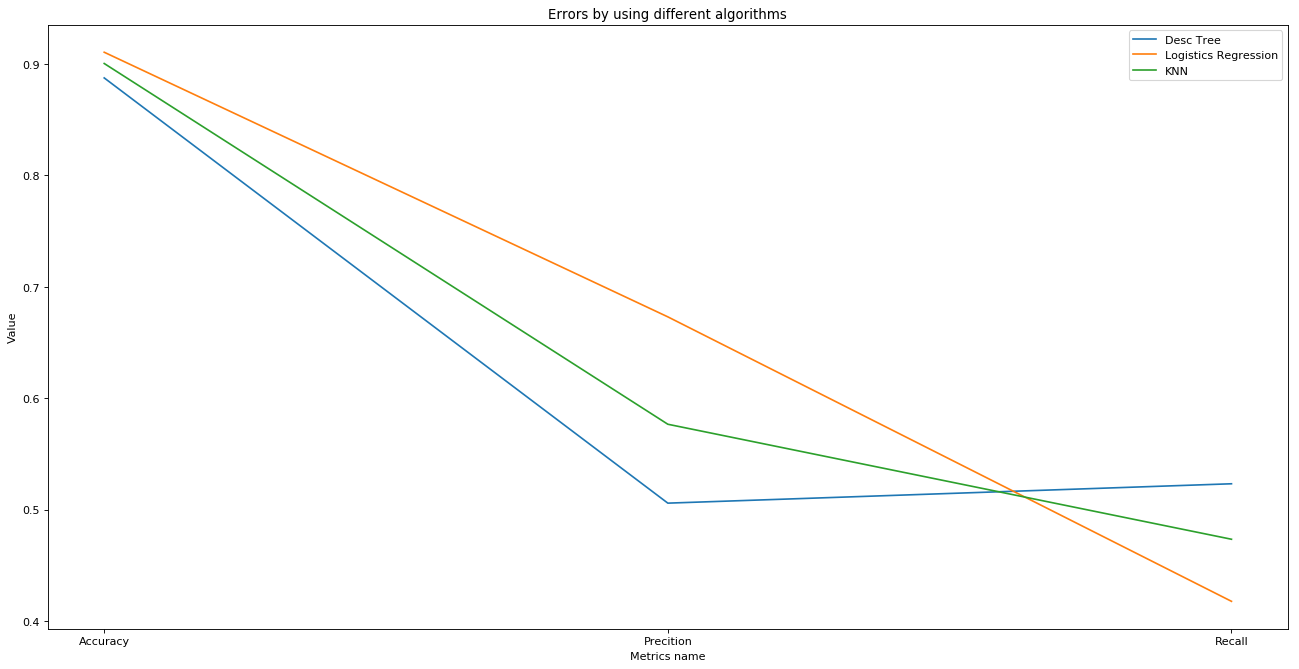

In [45]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
plt.figure(figsize=(20,10), dpi=80)
plt.xlabel('Metrics name')
plt.ylabel('Value')
plt.title('Errors by using different algorithms')
plot1 = plt.plot(['Accuracy', 'Precition', 'Recall'],metrics_scores(y_test,tr_predict), label = 'Desc Tree')
plot3 = plt.plot(['Accuracy', 'Precition', 'Recall'],metrics_scores(y_test,reg_predict), label = 'Logistics Regression')
plot4 = plt.plot(['Accuracy', 'Precition', 'Recall'],metrics_scores(y_test,knn_predict), label = 'KNN')
plt.legend(loc = 'upper right')


(-0.01, 1.01)

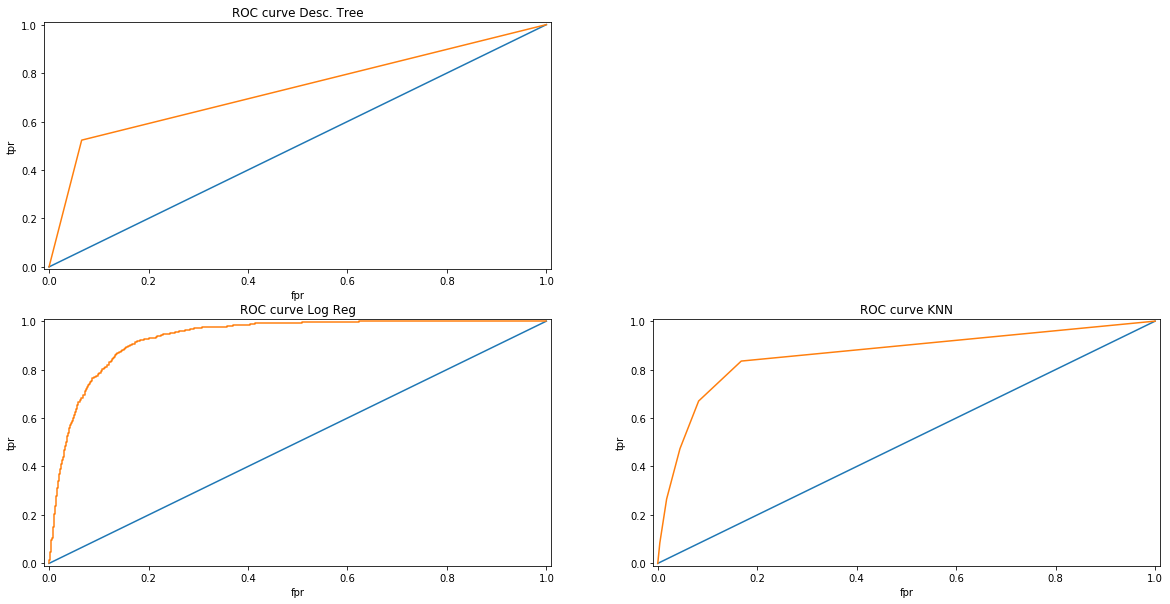

In [55]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, tr_predict_proba[:,1])
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve Desc. Tree')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

#третий график
fpr, tpr, thresholds = roc_curve(y_test, reg_predict_proba[:,1])
plt.subplot(223)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve Log Reg')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

#четвёртый график
fpr, tpr, thresholds = roc_curve(y_test, knn_predict_proba[:,1])
plt.subplot(224)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve KNN')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [59]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
# for DT
print(cross_val_score(
    tree,
    X,
    y,
    scoring='roc_auc',
    cv=10
))

C:\Users\Admin\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0.72739884 0.73635317 0.74758614 0.72772436 0.70809463 0.75155479
 0.75063468 0.70293999 0.7351993  0.73902247]


In [60]:
# for KNN
print(np.mean(cross_val_score(
    knn,
    X,
    y,
    scoring='roc_auc',
    cv=10
)))

0.8779841433007164


In [62]:
#for LR
print(np.mean(cross_val_score(
    reg,
    X,
    y,
    scoring='roc_auc',
    cv=10
)))

0.9293470129011101


In [44]:
#Берём модели и предсказываем
knn_predict_test_data = knn.predict(df_test_preproc)
#создали колонку Target c предсказанными значениями
my_sub = pd.DataFrame(test['_id'])
my_sub['target'] = pd.DataFrame(knn_predict_test_data, columns = ['target'])
my_sub.to_csv('my_sub_knn_untuned.csv',index = False)

In [45]:
# Взять Des Tree

tr_predict_test_data = tree.predict(df_test_preproc)
#создали колонку Target c предсказанными значениями
my_sub = pd.DataFrame(test['_id'])
my_sub['target'] = pd.DataFrame(tr_predict_test_data, columns = ['target'])
my_sub.to_csv('my_sub_tree.csv',index = False)

### Попробуем настроить модели для K-nn и для DT тк  они показали себя лучше всего на лидерборд в соревновании


#### Начнём с деревьев решений

In [68]:
from sklearn.model_selection import GridSearchCV

In [62]:
#создадим словарь с параметрами для решающщего дерева
tree_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

In [68]:
tree_grid = GridSearchCV(tree, tree_params,
cv=7, n_jobs=-1,verbose=True)

In [69]:
tree_grid.fit(X, y)

Fitting 7 folds for each of 150 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 647 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 1043 out of 1050 | elapsed:   23.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   23.5s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [70]:
tree_grid.best_params_

{'max_depth': 7, 'max_features': 18}

In [71]:
tree_grid.best_score_

0.9092958723551856

In [93]:
tree_grid_pred = tree_grid.predict(X_test)

In [97]:
roc_auc_score(y_test, tree_grid_pred)

0.6800273425434341

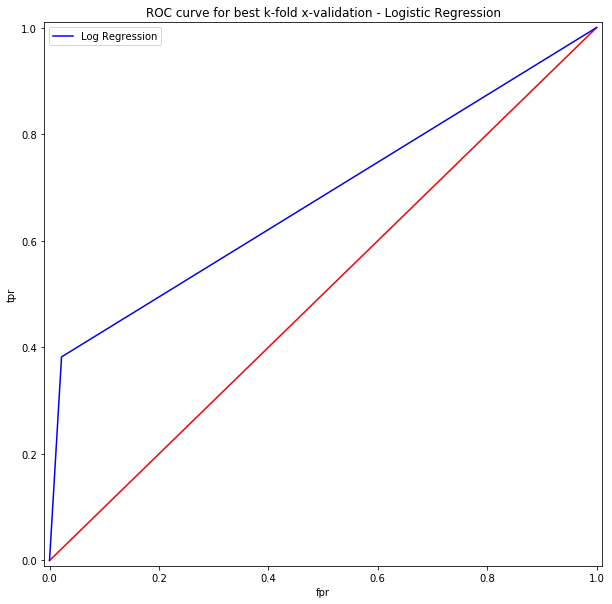

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, tree_grid_pred)
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], color = 'red')
plt.plot(fpr, tpr, label = 'Log Regression', color = 'blue')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve for best k-fold x-validation - Logistic Regression')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

In [67]:
dt_grid = tree_grid.predict(df_test_preproc)

In [61]:
# Взять Des Tree

tr_predict_test_data = tree.predict(df_test_preproc)
#создали колонку Target c предсказанными значениями
my_sub = pd.DataFrame(test['_id'])
my_sub['target'] = pd.DataFrame(tr_predict_test_data, columns = ['target'])
my_sub.to_csv('my_sub_tree_grid_search.csv',index = False)

#### Подберём параметры для  блиайшего соседа

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [65]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [76]:
knn_params = {'knn__n_neighbors': range(400, 451,10)}

In [77]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
                         cv=3, n_jobs=-1,
                        verbose=True)

In [78]:
knn_grid.fit(X, y)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'knn__n_neighbors': range(70, 75)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [103]:
scores_test = []
scores_train = []
# X, X_test, y, y_test = train_test_split(df_train_preproc, y_train
k_range = range(1, 2002,200)
for k in k_range:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X, y, )
    
    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X)
    scores_train.append(roc_auc_score(y, y_hat_train[:, 1]))
    


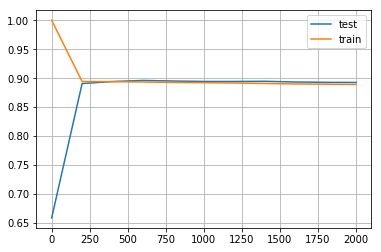

In [105]:
plt.plot(list(k_range), scores_test, label='test')
plt.plot(list(k_range), scores_train, label='train')
plt.grid()
plt.legend()


In [80]:
#k-fold 5
knn_grid.best_params_, knn_grid.best_score_

GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'knn__n_neighbors': range(70, 75)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [ ]:
scores_test = []
scores_train = []

for k in range(1, 150):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X_train, y_train, )
    
    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))

In [81]:
knn_pred = knn_grid.predict(X_test)

In [83]:
metrics_scores(y_test, knn_pred)

(0.8993795521985433, 0.6343490304709142, 0.27164887307236063)

In [87]:
#k-fold 7
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 8}, 0.8955370563070876)

In [88]:
knn_pred = knn_grid.predict(X_test)

In [89]:
metrics_scores(y_test, knn_pred)

(0.8980307526301592, 0.6559139784946236, 0.21708185053380782)

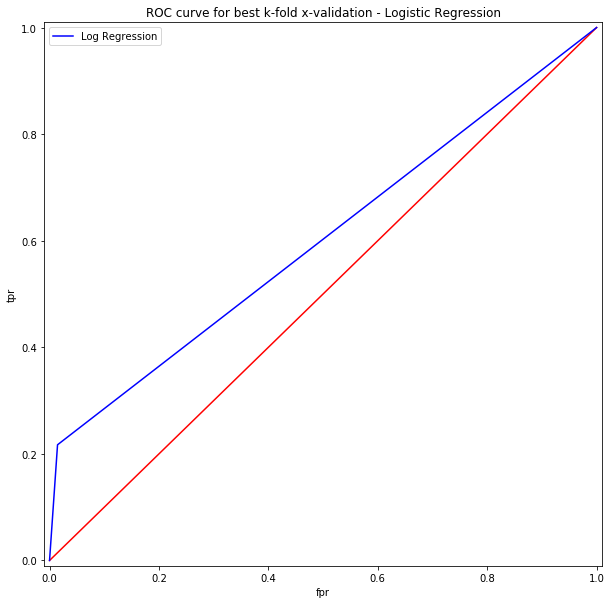

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], color = 'red')
plt.plot(fpr, tpr, label = 'Log Regression', color = 'blue')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve for best k-fold x-validation - Logistic Regression')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

In [99]:
#площадь под кривой для knn
roc_auc_score(y_test, knn_pred)

0.6012361010392369